# TP 1.1 - Minor Assignments 4 & 5

In [1]:
%matplotlib notebook

<div class="alert alert-danger">
  <b>Minor Assignment 4/13:</b> <br/>  
Muticlass setting: analyse the behaviour of Logistic Regression on the iris dataset included in the sklearn datasets. Discuss the performance of the algorithm on both training and test sets).
</div>

In [2]:
# ESTHER JAMET & ALEXIS CARBILLET
# Assignment 4

# import des bibliothèques
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# import data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# on instancie le modèle en spécifiant quel solver on veut utiliser pour trouver les paramètres
clf_lr = LogisticRegression(solver='lbfgs')

# on divise le dataset entre nos données d'entrainement et celles de test
X_train = X[:120, :]  # on prend 80% des données
y_train = y[:120]
X_test = X[120:150, :]  # on prend 20% des données
y_test = y[120:150]

# on entraine notre modèle
clf_lr.fit(X_train, y_train)

# On affiche les paramètres de notre modèle
print("intercept: {}".format(clf_lr.intercept_))
print("weights:   {}".format(clf_lr.coef_))

# pour les données train
k = 0
somme_proba = 0  # total des probabilités des données d'entrainement

while k < len(X_train):
    t = X_train[k, :]
    pred = clf_lr.predict([t])
    pred_pr = clf_lr.predict_proba([t])
    t_pred = pred[0]
    t_pred_pr = pred_pr[0]
    print("Prediction: {}, probability: {}".format(t_pred, t_pred_pr[t_pred]))
    k += 1
    somme_proba += t_pred_pr[t_pred]
    
print('Probabilité moyenne: ', somme_proba / k)

# pour les données test
k = 0
somme_proba = 0  # total des probabilités des données de tests

while k < len(X_test):
    t = X_test[k, :]
    pred = clf_lr.predict([t])
    pred_pr = clf_lr.predict_proba([t])
    t_pred = pred[0]
    t_pred_pr = pred_pr[0]
    print("Prediction: {}, probability: {}".format(t_pred, t_pred_pr[t_pred]))
    k += 1
    somme_proba += t_pred_pr[t_pred]
    
print('Probabilité moyenne: ', somme_proba / k)

# affichage
train_score = clf_lr.score(X_train, y_train)
test_score = clf_lr.score(X_test, y_test)

print("Training set score: {:.2f} ".format(train_score))
print("Test set score: {:.2f} ".format(test_score))


intercept: [  6.62668728   3.85227855 -12.09991039]
weights:   [[-0.43956809  0.90517738 -2.31465638 -0.96708895]
 [-0.0480681  -1.95501102  0.8340003  -0.9114576 ]
 [-0.41085419 -0.56355944  2.52229345  1.90487121]]
Prediction: 0, probability: 0.9116634475329357
Prediction: 0, probability: 0.8159066197370132
Prediction: 0, probability: 0.8672874183608413
Prediction: 0, probability: 0.8271531414489435
Prediction: 0, probability: 0.9248486932814792
Prediction: 0, probability: 0.9524433406033066
Prediction: 0, probability: 0.9019602030589667
Prediction: 0, probability: 0.888557029748713
Prediction: 0, probability: 0.789980121132985
Prediction: 0, probability: 0.8181992877674084
Prediction: 0, probability: 0.9325368491515394
Prediction: 0, probability: 0.8799243215611906
Prediction: 0, probability: 0.8050052579829927
Prediction: 0, probability: 0.832969754069486
Prediction: 0, probability: 0.9692645158630813
Prediction: 0, probability: 0.9843063198487246
Prediction: 0, probability: 0.9656

C:\Users\jamet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


On remarque qu'on ne peut pas faire de prédiction pour les premières données : c'est normal, notre algorithme n'est pas entrainé.
On arrive à faire une prédiction au bout de 50 données (25 couples de lignes), ce qui est cohérent car c'est le minimal à avoir en théorie pour pouvoir effectuer une prédiction.
Le training set score est de 0.95 alors que le test set score est de 0.63 : il y a une différence entre les deux de 0.32. Cela signifie que les résultats des test sont moins proches de ce qui est attendu que ceux de l'entrainement (63% de ressemblance contre 95%).
Il y a également une probabilité moyenne plus élevée pour les données d'entrainement (de 0.8146330072531223 contre 0.5793476144582403) d'où un score plus élevé lors de la phase d'entrainement.

<div class="alert alert-danger">
  <b>Minor Assignment 5/13:</b> <br/>  
Plot the line obtained by the linear regression. Evaluate several experimental feature transformations and compare the results. Use K-fold cross validation for this comparison.
</div>

<IPython.core.display.Javascript object>


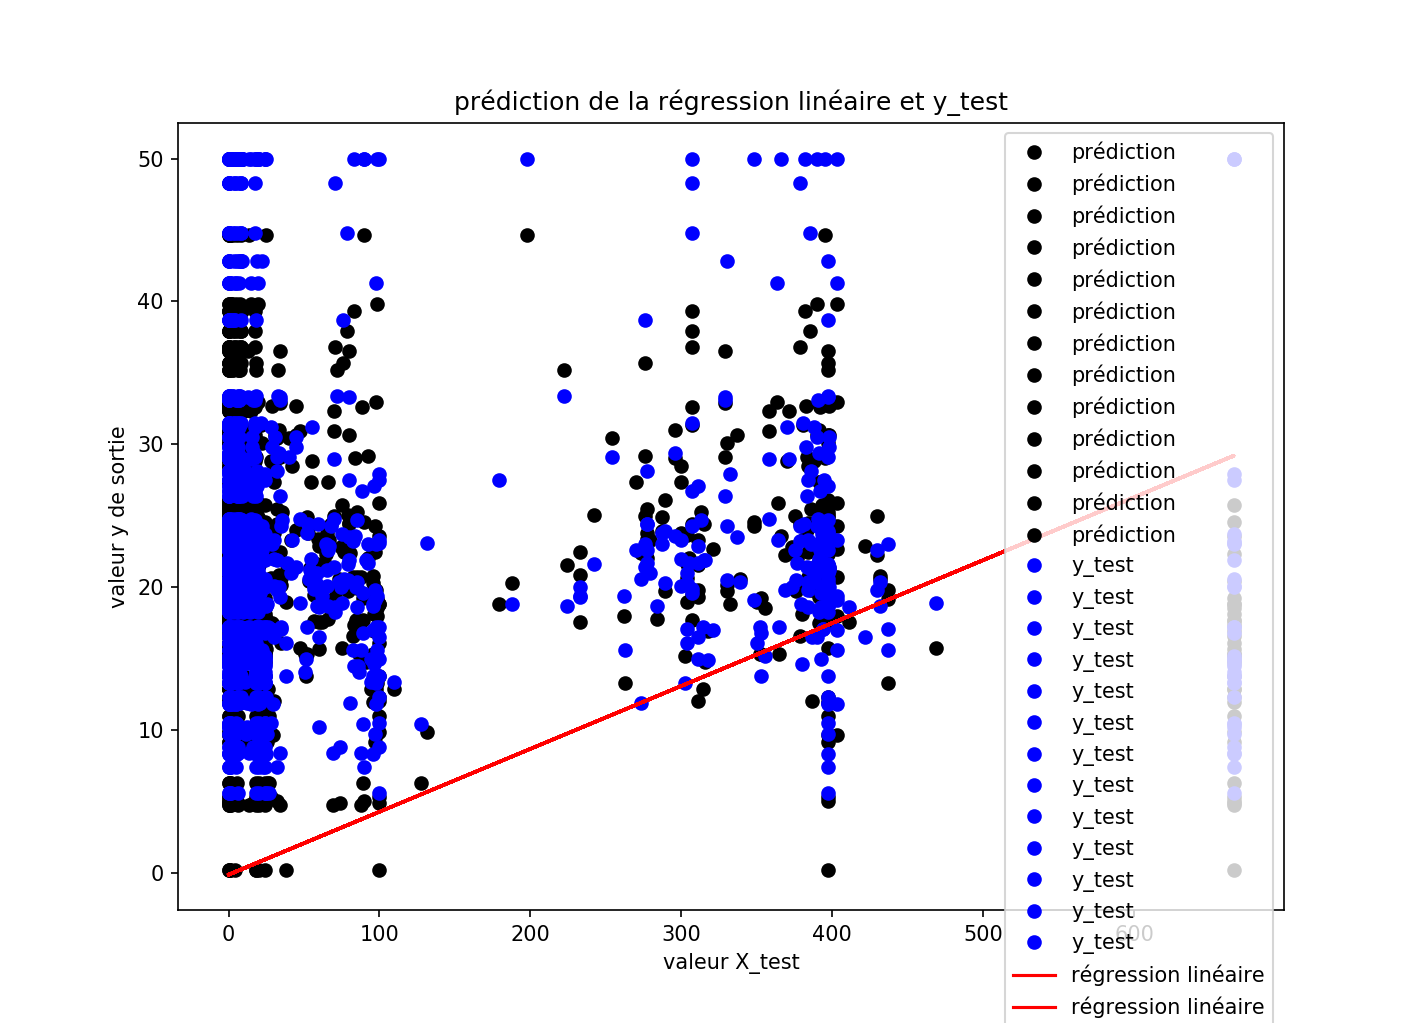

<IPython.core.display.Javascript object>


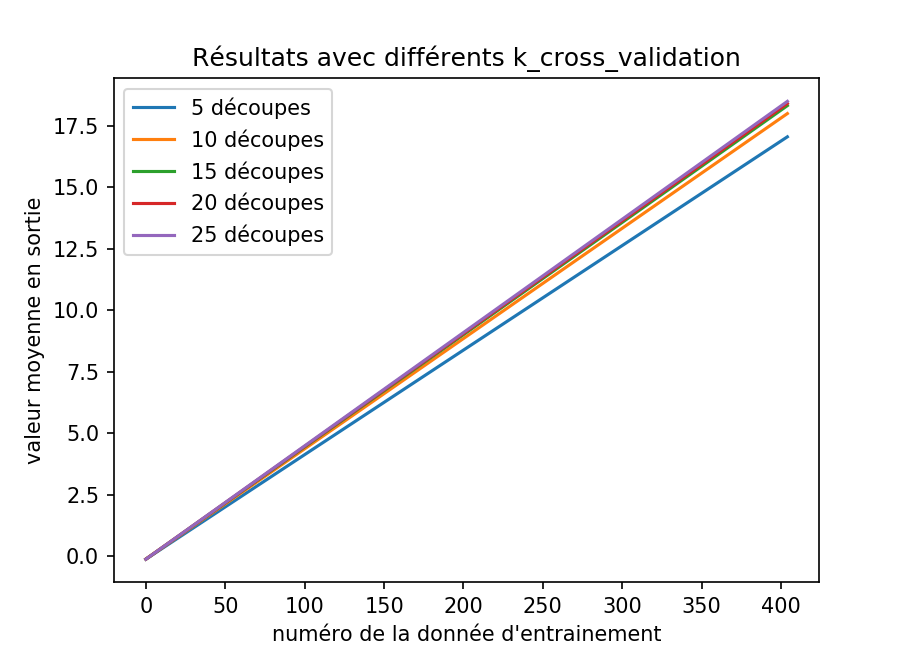

Training set score: 0.75 pour k= 5
Test set score: 0.36 pour k=5
Training set score: 0.74 pour k= 10
Test set score: 0.34 pour k=10
Training set score: 0.74 pour k= 15
Test set score: 0.38 pour k=15
Training set score: 0.74 pour k= 20
Test set score: 0.08 pour k=20
Training set score: 0.74 pour k= 25
Test set score: 0.23 pour k=25


In [3]:
# ESTHER JAMET & ALEXIS CARBILLET
# Assignment 5

# import des bibliothèques
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# on importe les données
bhpd = load_boston()

# on sépare notre datatset en deux parties, une d'entrainement et l'autre de test
X_train, X_test, y_train, y_test = train_test_split(bhpd.data, bhpd.target, random_state=0)

# on entraine notre modèle
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)
fig = plt.figure(1, figsize=(4, 3))
plt.plot(X_test, y_pred, 'o', color='black', label='prédiction')
plt.plot(X_test, y_test, 'o', color='blue', label='y_test')
plt.plot(X_test, lr.coef_[0] + lr.coef_[1] * X_test, c="red", label='régression linéaire')
plt.title('prédiction de la régression linéaire et y_test')
plt.xlabel('valeur X_test')
plt.ylabel('valeur y de sortie')
plt.legend()
plt.show()

data = bhpd.data
target = bhpd.target


# renvoie les coefficients de la régression linéaire moyenne ainsi que les scores d'entrainement et de test moyens
def moyenne_k_cross_validation(k, coef0, coef1, score_train, score_test):
    return coef0 / k, coef1 / k, score_train / k, score_test / k


# définit la validation croisée pour un nombre de découpage donné
def k_cross_validation(k, data, target):  # k est le nombre de sous intervalles
    nb_sous_intervalle = int(np.floor(len(data) / k))
    x = range(len(data) - nb_sous_intervalle)  # on enlève le nombre de données de test
    somme_coef0 = 0
    somme_coef1 = 0
    somme_train_score = 0
    somme_test_score = 0
    
    for i in range(k):
        A = data[:i * nb_sous_intervalle, :]  # haut matrice inputs train
        B = data[(i + 1) * nb_sous_intervalle:, :]  # bas matrice inputs train
        X_train = np.concatenate((A, B), axis=0)  # on forme une matrice globale
        X_test = data[i * nb_sous_intervalle:(i + 1) * nb_sous_intervalle, :]
        C = target[:i * nb_sous_intervalle]  # haut matrice outputs train
        D = target[(i + 1) * nb_sous_intervalle:]  # bas matrice outputs train
        y_train = np.concatenate((C, D))  # on forme une matrice globale
        y_test = target[i * nb_sous_intervalle:(i + 1) * nb_sous_intervalle]
        lr = LinearRegression().fit(X_train, y_train)  # a + b*x
        somme_train_score += lr.score(X_train, y_train)  # on somme les scores d'entrainement
        somme_test_score += lr.score(X_test, y_test)  # on somme les scores de test
        a = lr.coef_[0]  # ordonnée à l'origine
        b = lr.coef_[1]  # coefficient directeur
        somme_coef0 += a  # on somme les ordonnées à l'origine des régressions linéaires
        somme_coef1 += b  # on somme les coefficients directeurs des régressions linéaires
        
    m = moyenne_k_cross_validation(k, somme_coef0, somme_coef1, somme_train_score, somme_test_score)
    print("Training set score: {:.2f} pour k= {}".format(m[2], k))  # on affiche le score moyen d'entrainement 
    print("Test set score: {:.2f} pour k={}".format(m[3], k))  # on affiche le score moyen de test
    return m  # on renvoie les coefficients de la régression linéaire moyenne ainsi que les scores moyens


def liste_k_cross_validation(liste_k, data, target):  # pour une liste de K
    liste_coefs = []
    mini = np.min(liste_k)  # le plus petit découpage aura le plus grand nombre de données test
    nb_sous_intervalle = int(np.floor(len(data) / mini))
    x = range(len(data) - nb_sous_intervalle)  
    # Toutes les droites seront tracées sur le même nombre de données. 
    # Sinon on aurait des droites de différentes tailles
    fig = plt.figure(2, figsize=(4, 3))
    
    for i in liste_k:  # on fait la validaton croisée pour un nombre d'intervalle i
        liste_coefs.append(k_cross_validation(i, data, target))
    
    for i in range(len(liste_k)):  # on trace la régression linéaire moyenne pourle nombre de découpage i
        plt.plot(x, liste_coefs[i][0] + liste_coefs[i][1] * x, label='{} découpes'.format(liste_k[i]))
    
    plt.legend()
    plt.title('Résultats avec différents k_cross_validation')
    plt.xlabel("numéro de la donnée d'entrainement")
    plt.ylabel('valeur moyenne en sortie')
    plt.show()


# on fait une validation croisée pour 5, 10, 15, 20 et 25 découpages
liste_k_cross_validation([5, 10, 15, 20, 25], data, target)


k=15 est à privilégier car il correspond au plus grand score au test (qui est de 0.38)

(Remarque : la légende de la première figure s'affiche correctement sur Pyzo)